# Problem Statement

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

### FEATURES

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located



In [79]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [80]:
train=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')

In [81]:
df_doc=pd.concat([train,test])
df_doc

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%
...,...,...,...,...,...,...,...
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%


In [82]:
train.shape, test.shape

((5961, 7), (1987, 6))

In [83]:
#Checking for null values
df_doc.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
dtype: int64

We can see that Missing 'Fees' belongs to the test data, where as 'Rating' is a important columns we can't drop but we can fill the null values

In [84]:
#Filling null values
df_doc["Miscellaneous_Info"].fillna("missing",inplace=True)
df_doc["Rating"].fillna('0%',inplace=True)

In [85]:
df_doc.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%
2,9 years experience,300.0,missing,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0%
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0%
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%


In [86]:
#Again checking for null values
df_doc.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info       0
Place                   31
Profile                  0
Qualification            0
Rating                   0
dtype: int64

We have huge data so either we can drop the these 31 places rows or replace with top places

In [94]:
#Dropping null rows
df_doc.dropna(subset=['Place'],inplace=True)

In [95]:
#Again checking for null values
df_doc.isnull().sum()

Experience               0
Fees                  1981
Miscellaneous_Info       0
Place                    0
Profile                  0
Qualification            0
Rating                   0
dtype: int64

We can see that all the missing/null values are now replaced/filled/removed except the test 'Fees'

In [96]:
#Striping off " years experience"
df_doc["Experience"]=df_doc["Experience"].str.strip(" years experience").astype(int)

In [97]:
df_doc["Experience"].head()

0    24
1    12
2     9
3    12
4    20
Name: Experience, dtype: int32

In [99]:
df_doc['Locality'] = df_doc['Place'].str.split(',').str[0]
df_doc['City'] = df_doc['Place'].str.split(',').str[1]

In [100]:
df_doc.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Locality,City
0,24,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,Kakkanad,Ernakulam
1,12,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Whitefield,Bangalore
2,9,300.0,missing,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",0%,Mathikere - BEL,Bangalore
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",0%,Bannerghatta Road,Bangalore
4,20,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,Keelkattalai,Chennai


We can now drop the Place column as we have extracted the details in Locality and City, Also we have 'Miscellaneous_Info' column in which similar data is present also lots of missing values, we can drop it as well

In [101]:
df_doc.drop(columns=['Miscellaneous_Info','Place'],axis=1,inplace=True)

In [102]:
df_doc.head()

,Experience,Fees,Profile,Qualification,Rating,Locality,City
0,24,100.0,Homeopath,"BHMS, MD - Homeopathy",100%,Kakkanad,Ernakulam
1,12,350.0,Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Whitefield,Bangalore
2,9,300.0,ENT Specialist,"MBBS, MS - Otorhinolaryngology",0%,Mathikere - BEL,Bangalore
3,12,250.0,Ayurveda,"BSc - Zoology, BAMS",0%,Bannerghatta Road,Bangalore
4,20,250.0,Ayurveda,BAMS,100%,Keelkattalai,Chennai


Now we have to extract 'Qualification' column

In [103]:
# Checking the Maximum and Minimum number of qualifications
qual = df_doc.Qualification.apply(lambda x: len(x.split(',')))
print("Maximum qualifications of a doctor in the Train dataset is {}\n".format(qual.max()))
print("And the qualifications is --> {}\n\n".format(df_doc.Qualification[qual.idxmax()]))
print("Minimum qualification of a doctor in the Train dataset is {}\n".format(qual.min()))
print("And the qualifications is --> {}\n\n".format(df_doc.Qualification[qual.idxmin()]))

Maximum qualifications of a doctor in the Train dataset is 17

And the qualifications is --> 1287                          MBBS, MD - General Medicine
1287    BDS, PG Diploma in Conservative, Endodontics a...
Name: Qualification, dtype: object


Minimum qualification of a doctor in the Train dataset is 1

And the qualifications is --> 4                                               BAMS
4    BDS, MDS - Conservative Dentistry & Endodontics
Name: Qualification, dtype: object




In [104]:
df_doc['qual_1'] = df_doc['Qualification'].str.split(',').str[0]
df_doc['qual_2'] = df_doc['Qualification'].str.split(',').str[1]
df_doc['qual_3'] = df_doc['Qualification'].str.split(',').str[2]
df_doc['qual_4'] = df_doc['Qualification'].str.split(',').str[3]
df_doc['qual_5'] = df_doc['Qualification'].str.split(',').str[4]
df_doc['qual_6'] = df_doc['Qualification'].str.split(',').str[5]
df_doc['qual_7'] = df_doc['Qualification'].str.split(',').str[6]
df_doc['qual_8'] = df_doc['Qualification'].str.split(',').str[7]
df_doc['qual_9'] = df_doc['Qualification'].str.split(',').str[8]
df_doc['qual_10'] = df_doc['Qualification'].str.split(',').str[9]
df_doc['qual_11'] = df_doc['Qualification'].str.split(',').str[10]
df_doc['qual_12'] = df_doc['Qualification'].str.split(',').str[11]
df_doc['qual_13'] = df_doc['Qualification'].str.split(',').str[12]
df_doc['qual_14'] = df_doc['Qualification'].str.split(',').str[13]
df_doc['qual_15'] = df_doc['Qualification'].str.split(',').str[14]
df_doc['qual_16'] = df_doc['Qualification'].str.split(',').str[15]
df_doc['qual_17'] = df_doc['Qualification'].str.split(',').str[16]

In [105]:
df_doc.head()

,Experience,Fees,Profile,Qualification,Rating,Locality,City,qual_1,qual_2,qual_3,...,qual_8,qual_9,qual_10,qual_11,qual_12,qual_13,qual_14,qual_15,qual_16,qual_17
0,24,100.0,Homeopath,"BHMS, MD - Homeopathy",100%,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12,350.0,Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,300.0,ENT Specialist,"MBBS, MS - Otorhinolaryngology",0%,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,250.0,Ayurveda,"BSc - Zoology, BAMS",0%,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,250.0,Ayurveda,BAMS,100%,Keelkattalai,Chennai,BAMS,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
df_doc.isnull().sum()

Experience          0
Fees             1981
Profile             0
Qualification       0
Rating              0
Locality            0
City                1
qual_1              0
qual_2           2541
qual_3           6057
qual_4           7418
qual_5           7762
qual_6           7874
qual_7           7902
qual_8           7909
qual_9           7911
qual_10          7915
qual_11          7916
qual_12          7916
qual_13          7916
qual_14          7916
qual_15          7916
qual_16          7916
qual_17          7916
dtype: int64

In [108]:
df_doc.shape

(7917, 24)

We can see that most of column from qual_10 to qual 17 are null, we can drop these columns, and can fill others null by 'None'

In [109]:
#Dropping qual_q10 to qual_17
df_doc.drop(columns=["qual_10","qual_11","qual_12","qual_13","qual_14","qual_15","qual_16","qual_17"],inplace=True)

In [110]:
df_doc['qual_2'].fillna("None",inplace=True)
df_doc['qual_3'].fillna("None",inplace=True)
df_doc['qual_4'].fillna("None",inplace=True)
df_doc['qual_5'].fillna("None",inplace=True)
df_doc['qual_6'].fillna("None",inplace=True)
df_doc['qual_7'].fillna("None",inplace=True)
df_doc['qual_8'].fillna("None",inplace=True)
df_doc['qual_9'].fillna("None",inplace=True)

In [113]:
df_doc.drop(columns=['Qualification'],inplace=True)

In [115]:
df_doc.head(20)

,Experience,Fees,Profile,Rating,Locality,City,qual_1,qual_2,qual_3,qual_4,qual_5,qual_6,qual_7,qual_8,qual_9
0,24,100.0,Homeopath,100%,Kakkanad,Ernakulam,BHMS,MD - Homeopathy,None,None,None,None,None,None,None
1,12,350.0,Ayurveda,98%,Whitefield,Bangalore,BAMS,MD - Ayurveda Medicine,None,None,None,None,None,None,None
2,9,300.0,ENT Specialist,0%,Mathikere - BEL,Bangalore,MBBS,MS - Otorhinolaryngology,None,None,None,None,None,None,None
3,12,250.0,Ayurveda,0%,Bannerghatta Road,Bangalore,BSc - Zoology,BAMS,None,None,None,None,None,None,None
4,20,250.0,Ayurveda,100%,Keelkattalai,Chennai,BAMS,None,None,None,None,None,None,None,None
5,8,100.0,Ayurveda,0%,Porur,Chennai,BAMS,None,None,None,None,None,None,None,None
6,42,200.0,Homeopath,0%,Karol Bagh,Delhi,BHMS,None,None,None,None,None,None,None,None
7,10,200.0,Dentist,99%,Arekere,Bangalore,BDS,None,None,None,None,None,None,None,None
8,14,100.0,General Medicine,0%,Old City,Hyderabad,MBBS,MD - General Medicine,None,None,None,None,None,None,None
9,23,100.0,Dentist,0%,Athani,Ernakulam,BSc,BDS,None,None,None,None,None,None,None


In [116]:
df_doc.isnull().sum()

Experience       0
Fees          1981
Profile          0
Rating           0
Locality         0
City             0
qual_1           0
qual_2           0
qual_3           0
qual_4           0
qual_5           0
qual_6           0
qual_7           0
qual_8           0
qual_9           0
dtype: int64

We can see that we have now the needed data to perfom EDA and to train our model for prediction

--Performing graphical EDA for the above data to get insight of data--

In [117]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

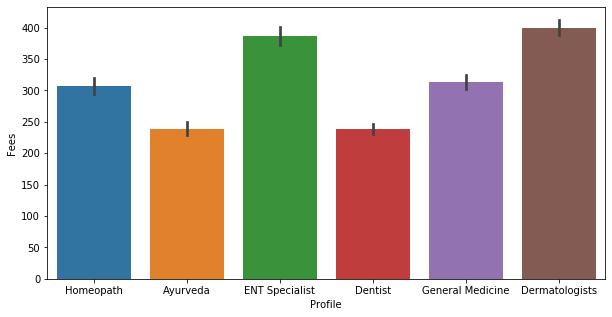

In [118]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_doc)
plt.show()

We can see that ENT and Dermatologists are charging more fees

In [128]:
pd.pivot_table(df_doc,index=['City'],values='Fees',aggfunc=[np.mean,np.median,min,max])

,mean,median,min,max
,Fees,Fees,Fees,Fees
City,,,,
Bangalore,328.842607,300.0,30.0,900.0
Chennai,283.602339,200.0,50.0,950.0
Coimbatore,154.298246,150.0,50.0,700.0
Delhi,363.006757,300.0,50.0,900.0
Ernakulam,188.431373,200.0,10.0,600.0
Hyderabad,307.507886,300.0,20.0,800.0
Mumbai,308.292863,200.0,10.0,920.0
Sector 5,250.000000,250.0,250.0,250.0


We can see that the doctors in Delhi have highest mean fees whereas it is lowest in Coimbatore

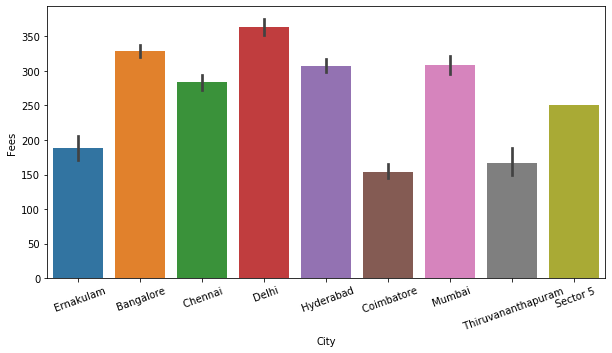

In [140]:
plt.figure(figsize=(10,5))
sns.barplot(x="City",y="Fees",data=df_doc)
plt.xticks(rotation=20)
plt.show()

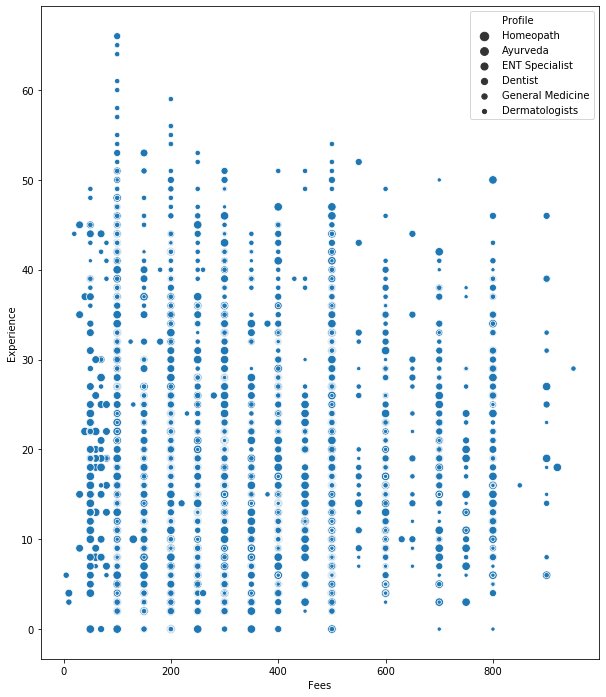

In [144]:
plt.figure(figsize=(10,12))
sns.scatterplot(y="Experience",x="Fees",size='Profile',data=df_doc)
plt.show()

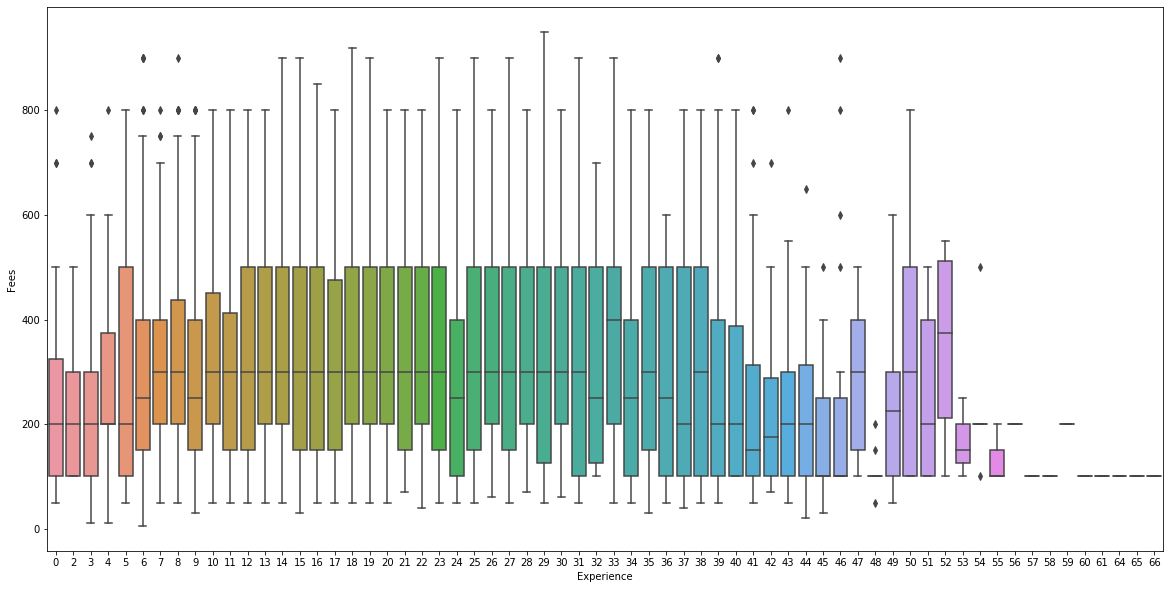

In [151]:
plt.figure(figsize=(20,10))
sns.boxplot(x="Experience",y="Fees",data=df_doc)
plt.show()

**We can see that doctor with maximum fees have experience range in 14 years to 34 years, and doctors with experience more than 40 are charging less fees**

In [152]:
df_doc.dtypes

Experience      int32
Fees          float64
Profile        object
Rating         object
Locality       object
City           object
qual_1         object
qual_2         object
qual_3         object
qual_4         object
qual_5         object
qual_6         object
qual_7         object
qual_8         object
qual_9         object
dtype: object

We have to encode these object type datasets first, we use Label Encoder here

In [154]:
#Encoding the data using Label Encoder
from sklearn.preprocessing import LabelEncoder
for col in df_doc.columns:
    if df_doc[col].dtype=="object":
        df_doc[col]=LabelEncoder().fit_transform(df_doc[col])

In [156]:
df_doc.tail()

,Experience,Fees,Profile,Rating,Locality,City,qual_1,qual_2,qual_3,qual_4,qual_5,qual_6,qual_7,qual_8,qual_9
1982,10,NaN,0,0,76,0,5,180,480,252,117,36,15,8,6
1983,4,NaN,2,0,135,1,110,491,309,252,117,36,15,8,6
1984,9,NaN,4,0,658,1,100,323,480,252,117,36,15,8,6
1985,12,NaN,1,51,34,0,6,494,480,252,117,36,15,8,6
1986,8,NaN,2,0,607,1,100,287,473,252,117,36,15,8,6


In [160]:
#Separating test and train data set
df_test=df_doc.loc[df_doc["Fees"].isnull()]

In [162]:
df_test.shape

(1981, 15)

We have separated test data and we will drop the test data using null values from our df_doc data set so that only train data will remain

In [163]:
df_doc.dropna(axis=0,inplace=True)

In [164]:
df_doc.shape

(5935, 15)

We have now left with only train data set in our df_doc

In [166]:
#Separating the input and output from train dataset
df_x=df_doc.drop(columns=["Fees"])
y=df_doc[["Fees"]]

In [167]:
#Performing scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [188]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [169]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [181]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [173]:
train_x,test_x,train_y,test_y=train_test_split(x, y,test_size=0.20,random_state=42)

In [174]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.11885585325658388 corresponding to random state:  43


In [176]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.09327281933862619 corresponding to random state:  48


In [177]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.16264748291682052 corresponding to random state:  63


In [178]:
AB=AdaBoostRegressor()
maxr2_score(AB,x,y)

max r2 score is :  0.15775048475935982 corresponding to random state:  43


In [179]:
GB=GradientBoostingRegressor()
maxr2_score(GB,x,y)

max r2 score is :  0.23623829697502274 corresponding to random state:  50


We can see the r2 score using different techniques, and Gradient Boosting Regression is giving maximum r2 score

In [187]:
#Using Grid search CV for best parameters to improve the r2 score
GB=GradientBoostingRegressor()
parameters =parameters = {
    "n_estimators":[5,50,100],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1,1]}
clf = GridSearchCV(GB,parameters, cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}

In [198]:
GB=GradientBoostingRegressor(learning_rate=0.1,max_depth=5,n_estimators=100)
maxr2_score(GB,x,y)

max r2 score is :  0.264753821532848 corresponding to random state:  63


We will now save our final model using Gradient Boost Regression model

In [203]:
#We have to remove the Fees(null) column from our test dataset in order to predict the fees using our final model
df_test.drop(columns=['Fees'],axis=1,inplace=True)

In [204]:
df_test.head(2)

,Experience,Profile,Rating,Locality,City,qual_1,qual_2,qual_3,qual_4,qual_5,qual_6,qual_7,qual_8,qual_9
0,35,4,0,217,6,100,494,480,252,117,36,15,8,6
1,31,3,0,923,5,100,159,480,252,117,36,15,8,6


In [205]:
#Saving our final model using Gradient Boosting Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=63,test_size=0.20)
GB.fit(train_x,train_y)
pred_doc_fee=GB.predict(df_test)

In [206]:
pred_doc_fee=pd.DataFrame(pred_doc_fee,columns=["Fees"])

In [208]:
#saving our predicted fee column to the system

pred_doc_fee.to_csv('fees.csv',index=False)

**This is we have saved the prdicted doctor fees file to the system**